In [2]:
!pip install livelossplot
import pandas as pd
import numpy as np

In [3]:
benign_df = pd.read_csv('/content/5.benign.csv')

g_c_df = pd.read_csv('/content/5.gafgyt.combo.csv')
g_j_df = pd.read_csv('/content/5.gafgyt.junk.csv')
g_s_df = pd.read_csv('content/5.gafgyt.scan.csv')
g_t_df = pd.read_csv('/content/5.gafgyt.tcp.csv')
g_u_df = pd.read_csv('/content/5.gafgyt.udp.csv')
m_a_df = pd.read_csv('/content/5.mirai.ack.csv')
m_sc_df = pd.read_csv('/content/5.mirai.scan.csv')
m_sy_df = pd.read_csv('/content/5.mirai.syn.csv')
m_u_df = pd.read_csv('/content/5.mirai.udp.csv')
m_u_p_df = pd.read_csv('/content/5.mirai.udpplain.csv')

In [4]:
benign_df['type'] = 'benign'
m_u_df['type'] = 'mirai_udp'
g_c_df['type'] = 'gafgyt_combo'
g_j_df['type'] = 'gafgyt_junk'
g_s_df['type'] = 'gafgyt_scan'
g_t_df['type'] = 'gafgyt_tcp'
g_u_df['type'] = 'gafgyt_udp'
m_a_df['type'] = 'mirai_ack'
m_sc_df['type'] = 'mirai_scan'
m_sy_df['type'] = 'mirai_syn'
m_u_p_df['type'] = 'mirai_udpplain'

In [5]:
df = pd.concat([benign_df, m_u_df, g_c_df,
                g_j_df, g_s_df, g_t_df,
                g_u_df, m_a_df, m_sc_df,
                m_sy_df, m_u_p_df],
                axis=0, sort=False, ignore_index=True)

In [6]:
df["type"].value_counts()


type
mirai_udp         156248
gafgyt_tcp        104510
gafgyt_udp        104011
mirai_scan         96781
mirai_syn          65746
benign             62154
gafgyt_combo       61380
mirai_ack          60554
mirai_udpplain     56681
gafgyt_junk        30898
gafgyt_scan        29297
Name: count, dtype: int64

<Axes: title={'center': 'Class Distribution'}>

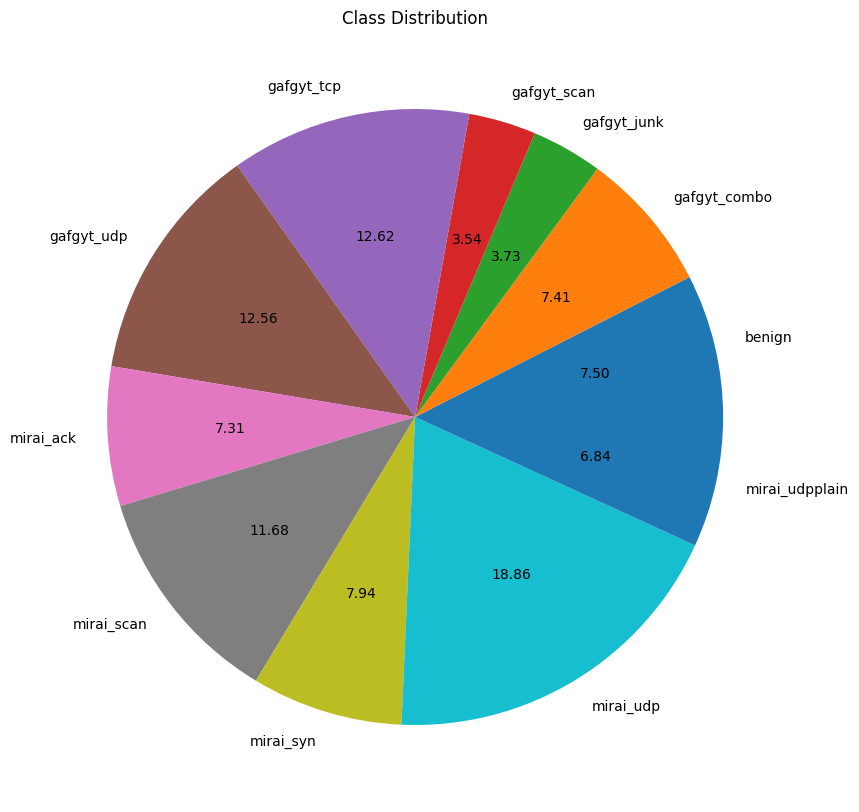

In [7]:
from matplotlib import pyplot as plt

plt.title("Class Distribution")
df.groupby("type").size().plot(kind='pie', autopct='%.2f', figsize=(20,10))

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828260 entries, 0 to 828259
Columns: 116 entries, MI_dir_L5_weight to type
dtypes: float64(115), object(1)
memory usage: 733.0+ MB


In [9]:
df = df.sample(frac=1).reset_index(drop=True)


In [10]:
df.head()


MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
0          1.000000       60.000000            0.000000          1.000000   
1          1.000000       60.000000            0.000000          1.000000   
2         48.336401       60.000570            0.007621         61.936980   
3        100.269244      204.266437        50443.912078        139.228856   
4         58.692488       61.462460           18.321464         99.180437   

   MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  MI_dir_L1_mean  \
0       60.000000            0.000000          1.000000       60.000000   
1       60.000000            0.000000          1.000000       60.000000   
2       60.006569            0.094491        163.321865       60.061228   
3      216.137029        52734.071536        322.334839      258.955954   
4       64.277562           41.549026        359.129941       68.633240   

   MI_dir_L1_variance  MI_dir_L0.1_weight  ...  HpHp_L0.1_covariance  \
0            0.000000            1.000000  ...                   0.0   
1            0.000000            1.000000  ...                   0.0   
2            1.040361         1937.633621  ...                   0.0   
3        58668.225203         3135.138228  ...                   0.0   
4           46.342102         3904.968304  ...                   0.0   

   HpHp_L0.1_pcc  HpHp_L0.01_weight  HpHp_L0.01_mean  HpHp_L0.01_std  \
0            0.0           1.000000             60.0        0.000000   
1            0.0           1.000000             60.0        0.000000   
2            0.0           1.000000             60.0        0.000000   
3            0.0        9833.868126            554.0        0.000095   
4            0.0           1.000000             60.0        0.000000   

   HpHp_L0.01_magnitude  HpHp_L0.01_radius  HpHp_L0.01_covariance  \
0                  60.0       0.000000e+00                    0.0   
1                  60.0       0.000000e+00                    0.0   
2                  60.0       0.000000e+00                    0.0   
3                 554.0       8.963980e-09                    0.0   
4                  60.0       0.000000e+00                    0.0   

   HpHp_L0.01_pcc            type  
0             0.0      gafgyt_tcp  
1             0.0      gafgyt_udp  
2             0.0      mirai_scan  
3             0.0  mirai_udpplain  
4             0.0       mirai_syn  

[5 rows x 116 columns]

In [11]:
label_col = "type"

In [12]:
feature_cols = list(df.columns)
feature_cols.remove(label_col)

In [13]:
X = df[feature_cols]
y = df[label_col]

In [14]:
X.shape

(828260, 115)

In [15]:
df['type'].value_counts()

type
mirai_udp         156248
gafgyt_tcp        104510
gafgyt_udp        104011
mirai_scan         96781
mirai_syn          65746
benign             62154
gafgyt_combo       61380
mirai_ack          60554
mirai_udpplain     56681
gafgyt_junk        30898
gafgyt_scan        29297
Name: count, dtype: int64

In [16]:
n_classes = len(np.unique(y))
n_classes

11

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828260 entries, 0 to 828259
Columns: 115 entries, MI_dir_L5_weight to HpHp_L0.01_pcc
dtypes: float64(115)
memory usage: 726.7 MB


In [18]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical 

cls_label_encoder = LabelEncoder()
y = cls_label_encoder.fit_transform(y)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, 
                                                    stratify=y)

In [20]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)
class_weights = {k: v for k,v in enumerate(class_weights)}
class_weights

{0: 1.2114532692937052,
 1: 1.2267247252584497,
 2: 2.43697268828752,
 3: 2.5700610508187944,
 4: 0.7204704204034411,
 5: 0.7239251872885254,
 6: 1.2434632642299384,
 7: 0.7780056946605219,
 8: 1.1452571612276539,
 9: 0.48190443774373115,
 10: 1.3284174861416012}

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
print(X_train.shape , y_train.shape)
print(X_test.shape , y_test.shape)

(662608, 115) (662608,)
(165652, 115) (165652,)


In [23]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [24]:
X_train.shape, X_test.shape

((662608, 115, 1), (165652, 115, 1))

In [25]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [26]:
y_train = to_categorical(y_train, num_classes=n_classes)
y_test = to_categorical(y_test, num_classes=n_classes)

In [27]:
input_shape = X_train.shape[1:]
input_shape

(115, 1)

In [28]:
y_train.shape

(662608, 11)

In [29]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Dense
from tensorflow.keras.layers import AvgPool1D, GlobalAveragePooling1D, MaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import ReLU, concatenate, GRU, Reshape
import tensorflow.keras.backend as K



In [30]:
def bn_rl_conv(x,filters,kernel=1,strides=1):
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv1D(filters, kernel, strides=strides,padding = 'same')(x)
    return x

In [31]:
def dense_block(x, repetition, filters):        
    for _ in range(repetition):
        y = bn_rl_conv(x, 4*filters)
        y = bn_rl_conv(y, filters, 3)
        x = concatenate([y,x])
    return x

In [32]:
def transition_layer(x):
    x = bn_rl_conv(x, K.int_shape(x)[-1] //2 )
    x = AvgPool1D(2, strides = 2, padding = 'same')(x)
    return x

In [33]:
#Densenet121    
def build_densenet(input_shape, n_classes, filters = 32):
    input = Input (input_shape)
    x = Conv1D(64, 7, strides = 2, padding = 'same')(input)
    x = MaxPool1D(3, strides = 2, padding = 'same')(x)   
    for repetition in [6,12,24,16]:
        
        d = dense_block(x, repetition, filters)
        x = transition_layer(d)    

    x = GlobalAveragePooling1D()(d)
    output = Dense(n_classes, activation = 'softmax')(x)   
    model = Model(input, output)
    return model

In [34]:
import keras.backend as K

def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [35]:
from tensorflow.keras.metrics import Recall, Precision
import tensorflow.keras as keras

filters = 32
clf = build_densenet(input_shape, n_classes, filters = 32)
clf.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall(), f1_score])   

clf.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 115, 1)]             0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 58, 64)               512       ['input_1[0][0]']             
                                                                                                  
 max_pooling1d (MaxPooling1  (None, 29, 64)               0         ['conv1d[0][0]']              
 D)                                                                                               
                                                                                                  
 batch_normalization (Batch  (None, 29, 64)               256       ['max_pooling1d[0][0]']   

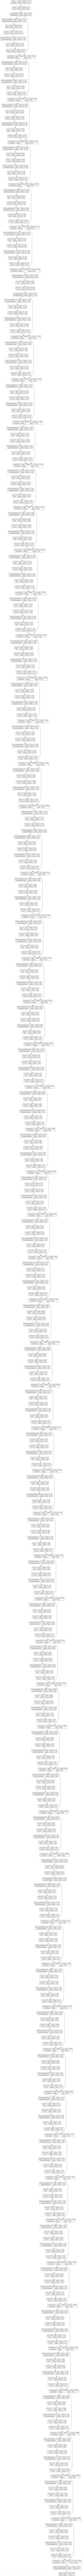

In [36]:
from tensorflow.keras.utils import plot_model

plot_model(clf, to_file="model_fig.jpg", show_shapes=True)

In [37]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from livelossplot import PlotLossesKeras


model_weights_file_path = "simple_model_weights.h5"
checkpoint = ModelCheckpoint(filepath=model_weights_file_path, monitor="val_accuracy", verbose=1, save_best_only=True, mode="max", save_weights_only=True)
early_stopping = EarlyStopping(monitor="val_accuracy", mode="max", verbose=1, patience=20)
lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=0, mode='max', min_delta=0.0001, cooldown=0, min_lr=0)
plotlosses = PlotLossesKeras()

call_backs = [checkpoint, early_stopping, lr_reduce, plotlosses]

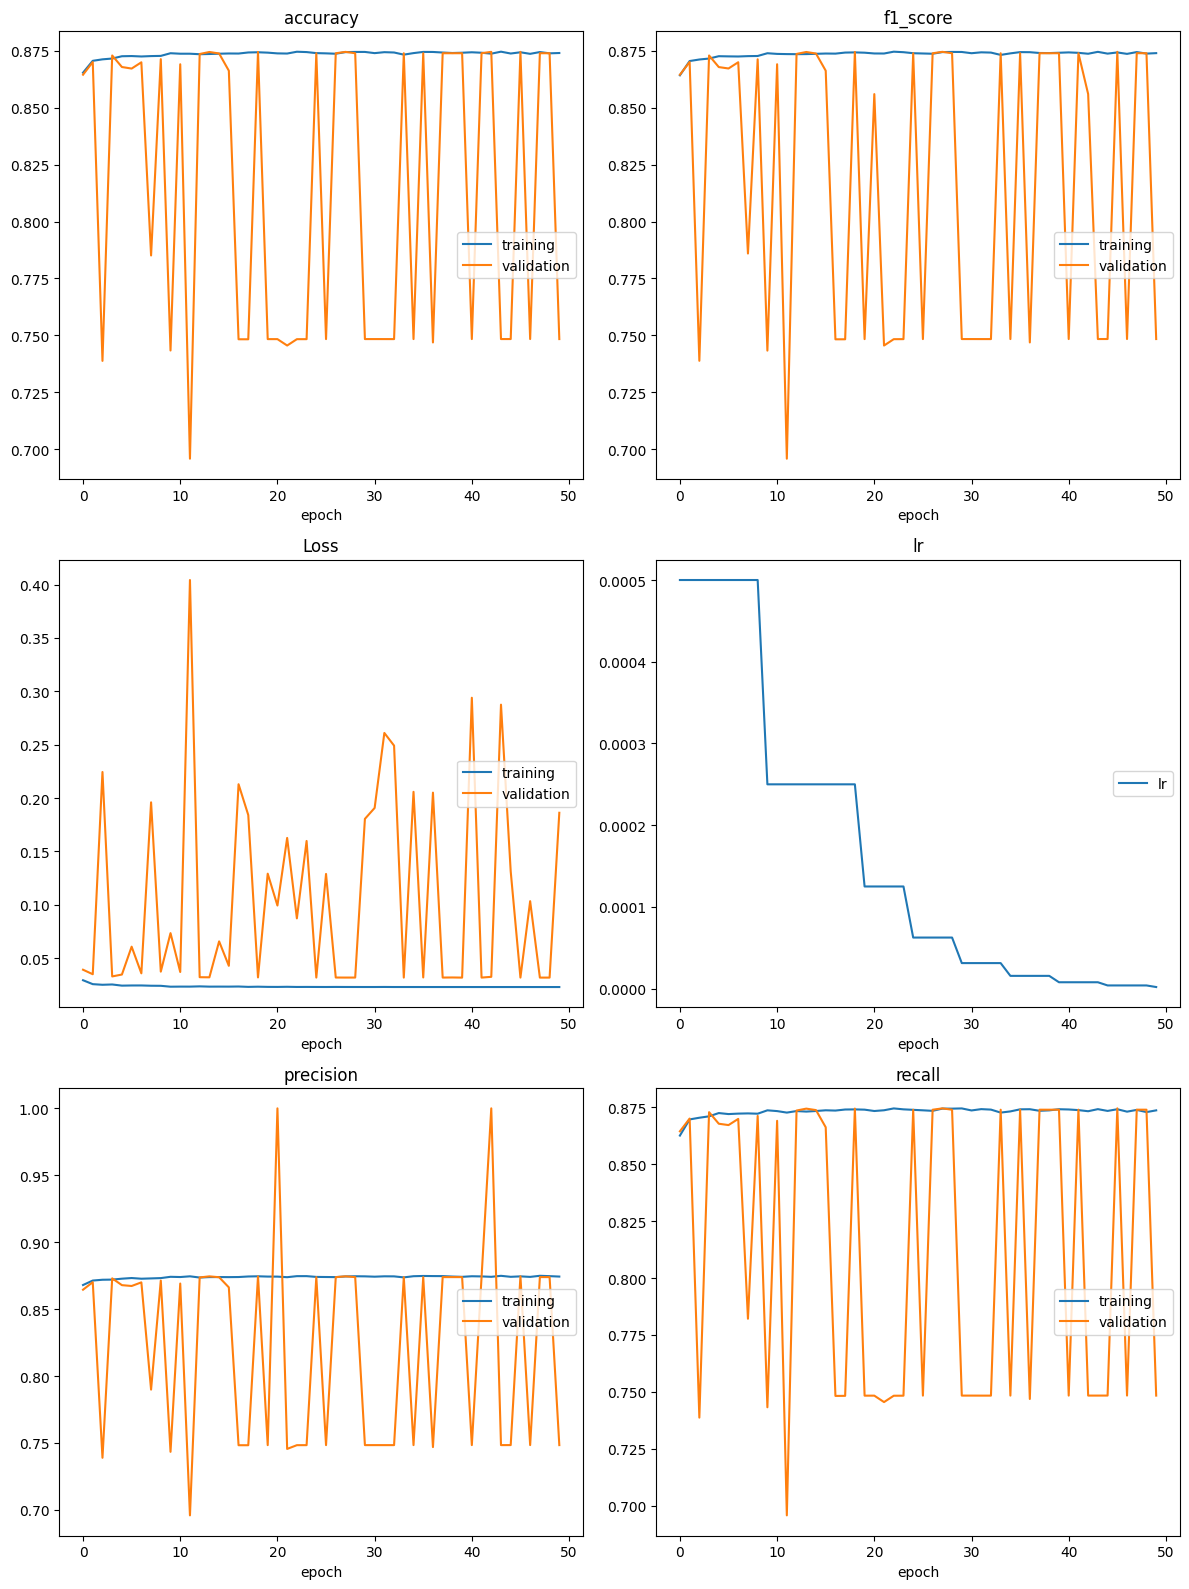

accuracy
	training         	 (min:    0.865, max:    0.875, cur:    0.874)
	validation       	 (min:    0.696, max:    0.874, cur:    0.748)
f1_score
	training         	 (min:    0.864, max:    0.875, cur:    0.874)
	validation       	 (min:    0.696, max:    0.874, cur:    0.748)
Loss
	training         	 (min:    0.023, max:    0.029, cur:    0.023)
	validation       	 (min:    0.032, max:    0.404, cur:    0.186)
lr
	lr               	 (min:    0.000, max:    0.001, cur:    0.000)
precision
	training         	 (min:    0.868, max:    0.875, cur:    0.874)
	validation       	 (min:    0.696, max:    1.000, cur:    0.748)
recall
	training         	 (min:    0.863, max:    0.874, cur:    0.874)
	validation       	 (min:    0.696, max:    0.874, cur:    0.748)
1295/1295 [==============================] - 235s 182ms/step - loss: 0.0229 - accuracy: 0.8739 - precision: 0.8743 - recall: 0.8736 - f1_score: 0.8739 - val_loss: 0.1862 - val_accuracy: 0.7484 - val_precision: 0.7484 - val_recall: 

In [38]:
EPOCHS = 50
BATCH_SIZE = 512

history = clf.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    #validation_split=0.1,
                    epochs=EPOCHS, 
                    batch_size=BATCH_SIZE,
                    callbacks=call_backs,
                    class_weight=class_weights,
                    verbose=1)


In [41]:
clf.load_weights(model_weights_file_path)


In [42]:
y_hat = clf.predict(X_test)

5177/5177 [==============================] - 87s 16ms/step


In [43]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle


def ROC_plot(y_true_ohe, y_hat_ohe, label_encoder): 
    n_classes = len(label_encoder.classes_)
    lw = 2
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_ohe[:, i], y_hat_ohe[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
                                  
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_true_ohe.ravel(), y_hat_ohe.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    plt.figure(figsize=(20,20))
    plt.plot(
        fpr["micro"],
        tpr["micro"],
        label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
        color="deeppink",
        linestyle=":",
        linewidth=4,
    )

    plt.plot(
        fpr["macro"],
        tpr["macro"],
        label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
        color="navy",
        linestyle=":",
        linewidth=4,
    )

    colors = cycle(["aqua", "darkorange", "cornflowerblue"])
    for i, color in zip(range(n_classes), colors):
        plt.plot(
            fpr[i],
            tpr[i],
            color=color,
            lw=lw,
            label="ROC curve of class {0} (area = {1:0.2f})".format(label_encoder.classes_[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], "k--", lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("multiclass characteristic")
    plt.legend(loc="lower right")
    plt.show()

In [44]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,confusion_matrix, classification_report, precision_score, recall_score
from sklearn.metrics import f1_score as f1_score_rep
import seaborn as sn
from tensorflow.keras.utils import to_categorical


def print_score(y_pred, y_real, label_encoder):
    print("Accuracy: ", accuracy_score(y_real, y_pred))
    print("Precision:: ", precision_score(y_real, y_pred, average="macro"))
    print("Recall:: ", recall_score(y_real, y_pred, average="macro"))
    print("F1_Score:: ", f1_score_rep(y_real, y_pred, average="macro"))

    print()
    print("Macro precision_recall_fscore_support (macro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="macro"))

    print()
    print("Macro precision_recall_fscore_support (micro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="micro"))

    print()
    print("Macro precision_recall_fscore_support (weighted) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="weighted"))
    
    print()
    print("Confusion Matrix")
    cm = confusion_matrix(y_real, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(cm, index = [i for i in label_encoder.classes_],
                  columns = [i for i in label_encoder.classes_])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True)

    print()
    print("Classification Report")
    print(classification_report(y_real, y_pred, target_names=label_encoder.classes_))

Accuracy:  0.8744597107188564
Precision::  0.9502097748572147
Recall::  0.9090762227270196
F1_Score::  0.8789600861292969

Macro precision_recall_fscore_support (macro) average
(0.9502097748572147, 0.9090762227270196, 0.8789600861292969, None)

Macro precision_recall_fscore_support (micro) average
(0.8744597107188564, 0.8744597107188564, 0.8744597107188564, None)

Macro precision_recall_fscore_support (weighted) average
(0.9310272257181919, 0.8744597107188564, 0.8326831113300057, None)

Confusion Matrix

Classification Report
                precision    recall  f1-score   support

        benign       1.00      1.00      1.00     12431
  gafgyt_combo       1.00      1.00      1.00     12276
   gafgyt_junk       1.00      1.00      1.00      6180
   gafgyt_scan       1.00      1.00      1.00      5859
    gafgyt_tcp       0.50      1.00      0.67     20902
    gafgyt_udp       0.95      0.00      0.00     20802
     mirai_ack       1.00      1.00      1.00     12111
    mirai_scan     

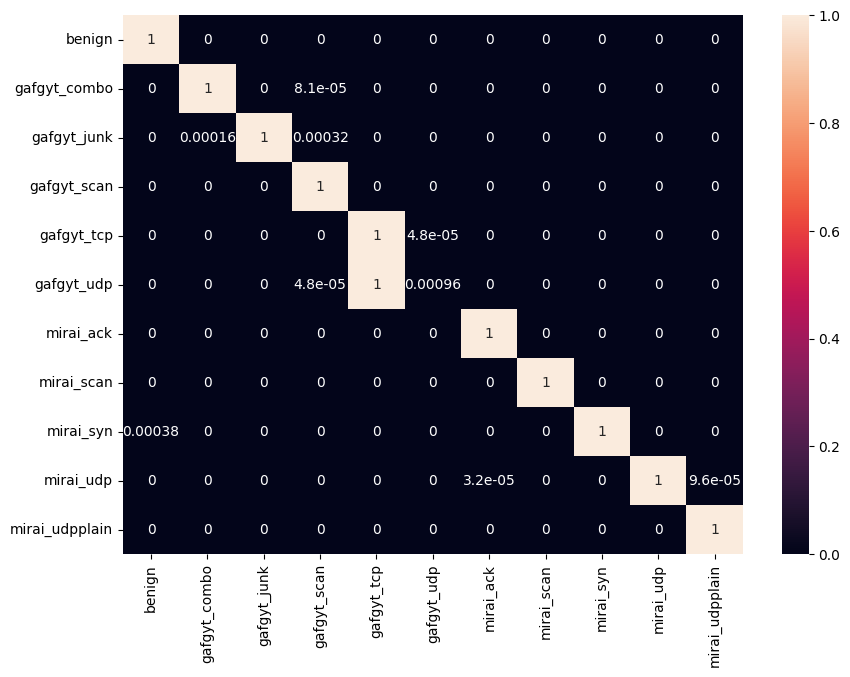

In [45]:
y_hat = np.argmax(y_hat, axis=1)
y_test = np.argmax(y_test, axis=1)

print_score(y_hat, y_test, cls_label_encoder)

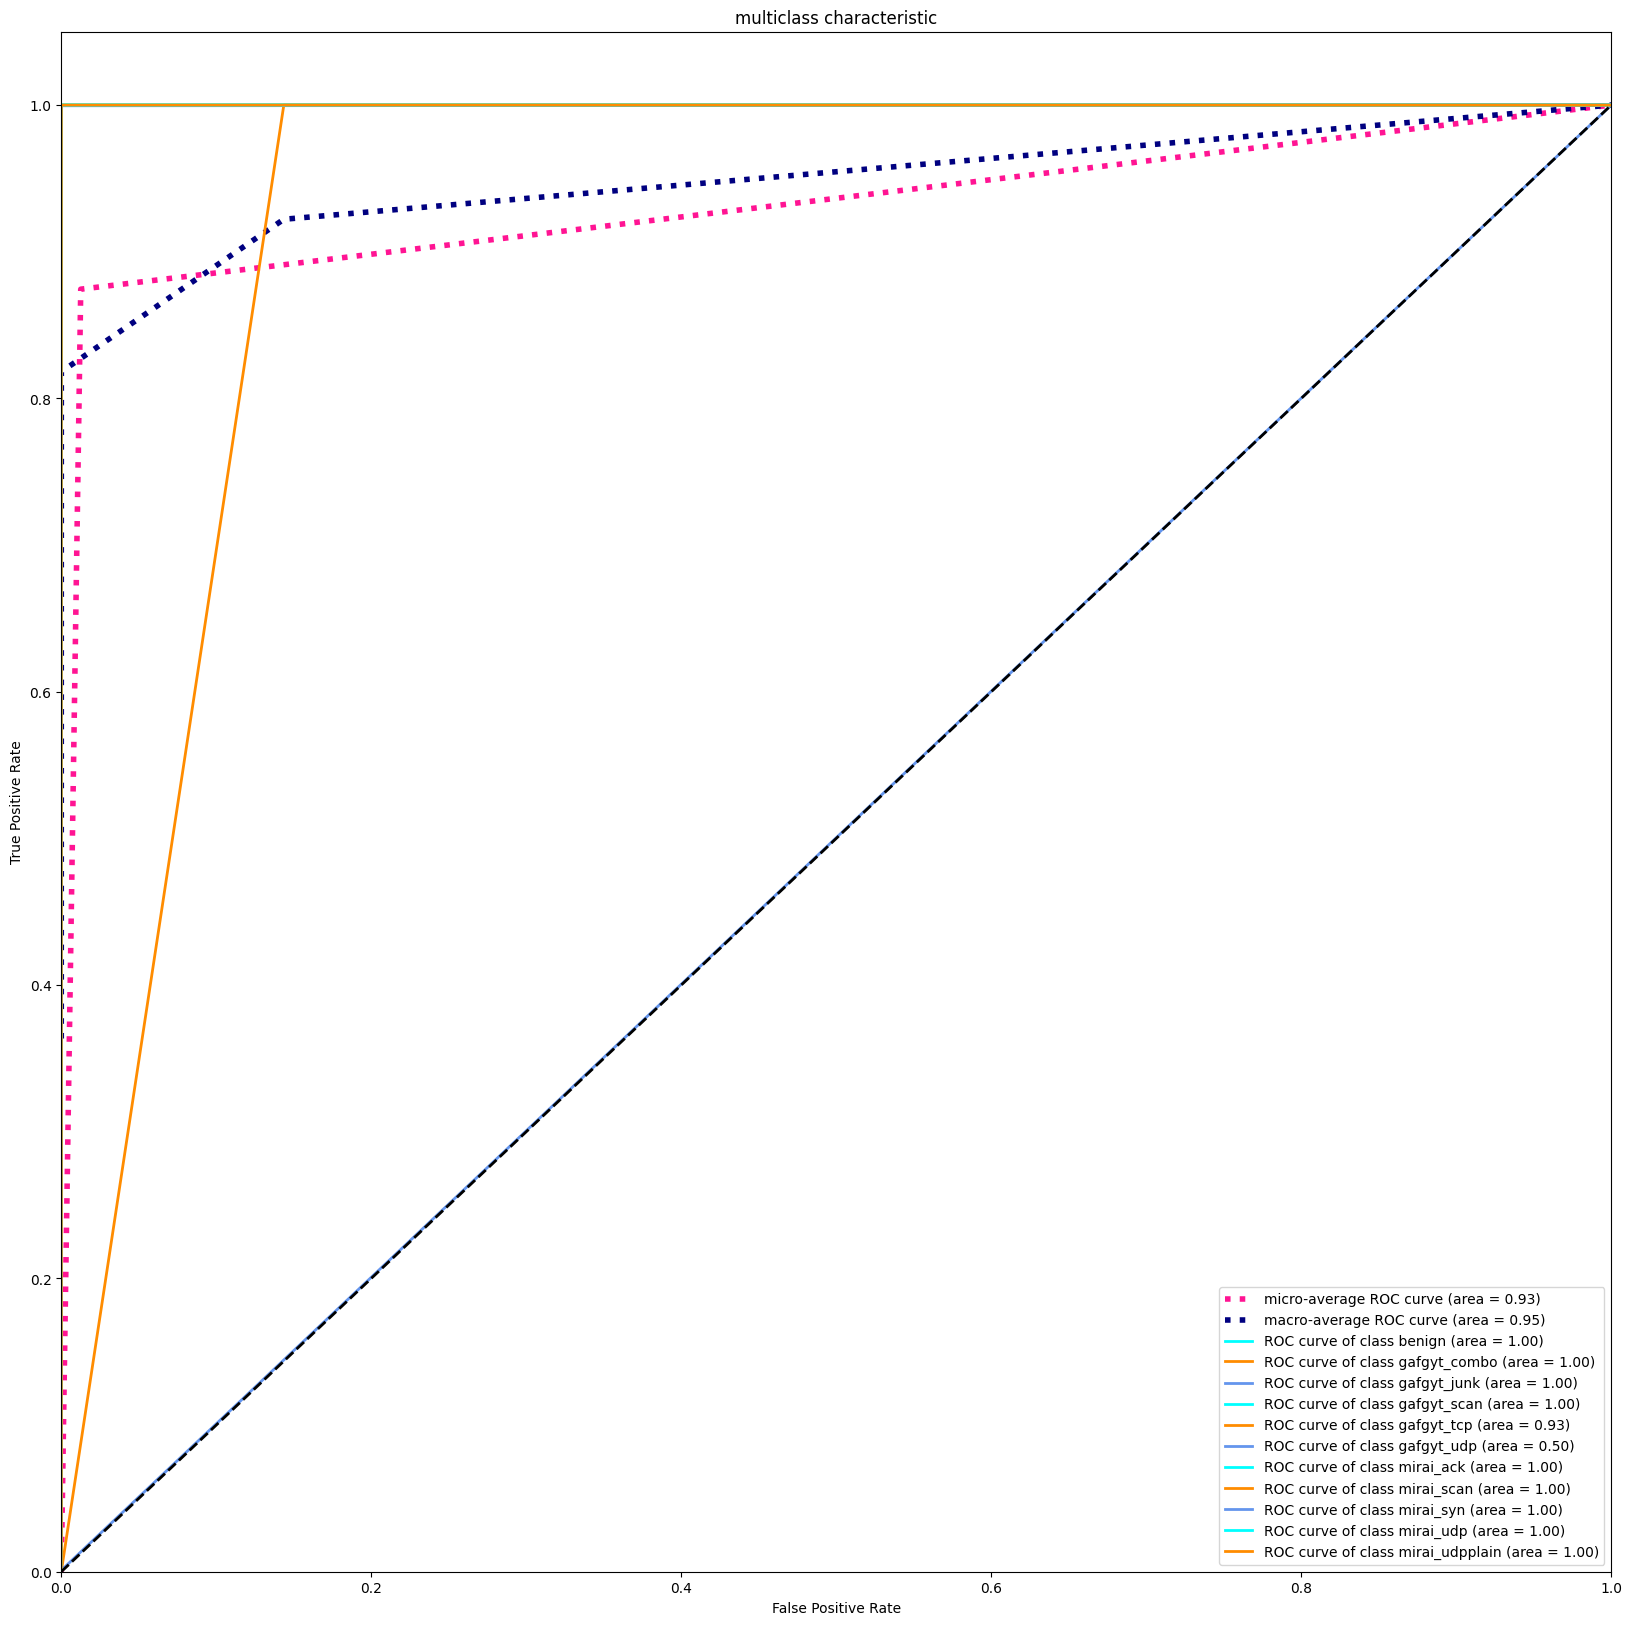

In [46]:
y_true_ohe = to_categorical(y_test, num_classes=n_classes)
y_hat_ohe =  to_categorical(y_hat, num_classes=n_classes)

ROC_plot(y_true_ohe, y_hat_ohe, cls_label_encoder)